# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL on the OpenWeatherMap API
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city"
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | mossel bay
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | mangai
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | nago
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | denia
Processing Record 11 of Set 1 | sinfra
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | ponta delgada
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | salinopolis
Processing Record 18 of Set 1 | aasiaat
Processing Record 19 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 20 of Set 1 | oliveira dos brejinhos
Processing Record 21 of Set 1 | asau village
City not found

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,48.69,77,100,4.07,AU,1690401661
1,mossel bay,-34.1831,22.1460,55.33,79,35,4.07,ZA,1690401661
2,iqaluit,63.7506,-68.5145,49.73,71,75,3.44,CA,1690401493
3,invercargill,-46.4000,168.3500,42.58,70,100,13.67,NZ,1690401662
4,waitangi,-43.9535,-176.5597,49.32,54,100,18.92,NZ,1690401662


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,48.69,77,100,4.07,AU,1690401661
1,mossel bay,-34.1831,22.1460,55.33,79,35,4.07,ZA,1690401661
2,iqaluit,63.7506,-68.5145,49.73,71,75,3.44,CA,1690401493
3,invercargill,-46.4000,168.3500,42.58,70,100,13.67,NZ,1690401662
4,waitangi,-43.9535,-176.5597,49.32,54,100,18.92,NZ,1690401662


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

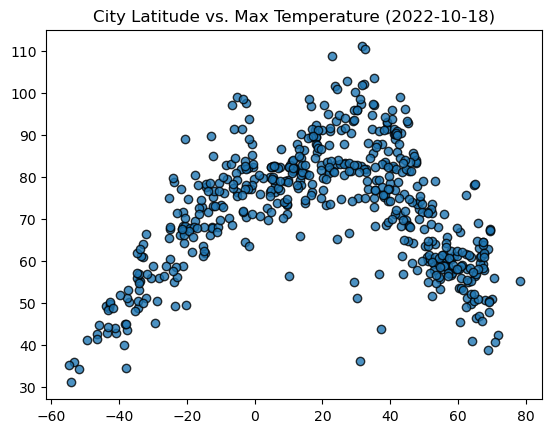

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

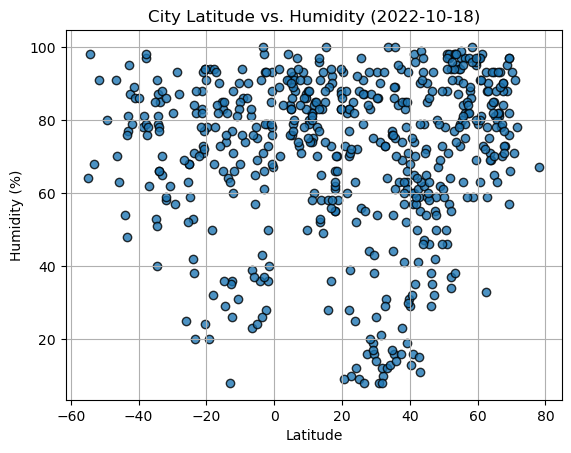

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

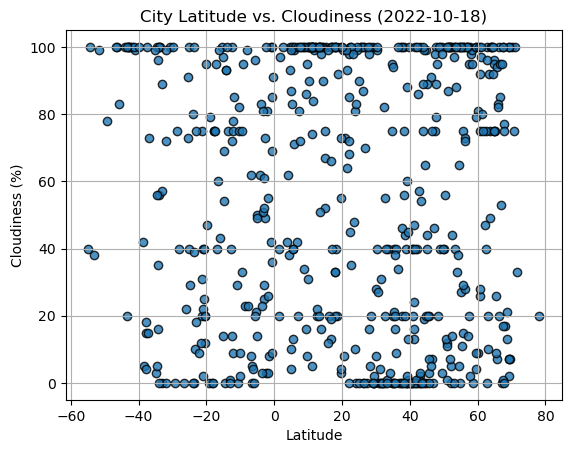

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

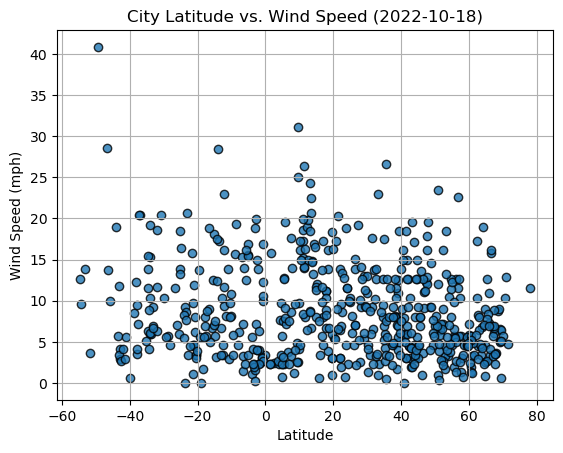

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Label the plot
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,iqaluit,63.7506,-68.5145,49.73,71,75,3.44,CA,1690401493
6,klyuchi,52.2667,79.1667,73.62,34,100,7.18,RU,1690401457
7,nago,26.5881,127.9761,83.25,87,100,15.12,JP,1690401456
8,kodiak,57.7900,-152.4072,56.71,88,100,5.75,US,1690401664
9,denia,38.8408,0.1057,82.74,78,0,7.00,ES,1690401665


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,48.69,77,100,4.07,AU,1690401661
1,mossel bay,-34.1831,22.1460,55.33,79,35,4.07,ZA,1690401661
3,invercargill,-46.4000,168.3500,42.58,70,100,13.67,NZ,1690401662
4,waitangi,-43.9535,-176.5597,49.32,54,100,18.92,NZ,1690401662
5,mangai,-4.0500,19.5333,81.86,36,62,1.14,CD,1690401662


###  Temperature vs. Latitude Linear Regression Plot

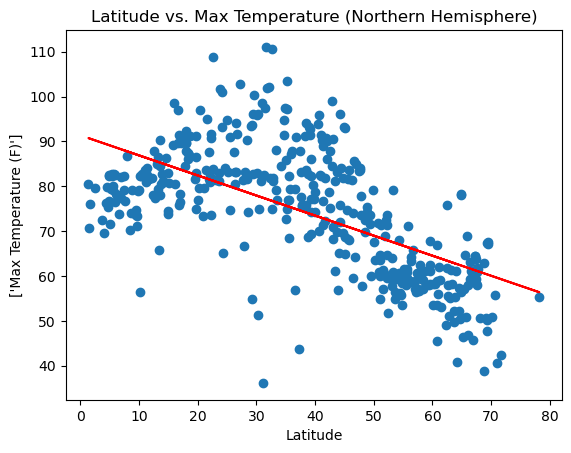

In [60]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude vs. Max Temperature (Northern Hemisphere)", ["Max Temperature (F)"], (0, 20))





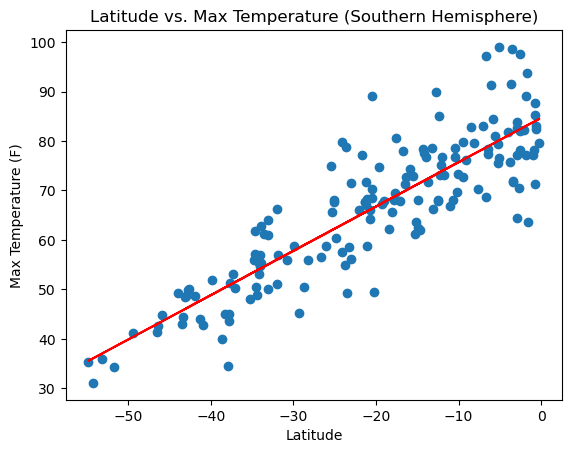

In [61]:
# Linear regression on Southern Hemisphere
from statistics import LinearRegression


x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude vs. Max Temperature (Southern Hemisphere)", "Max Temperature (F)", (-10,20))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# The northern hemisphere shows a positive correlation between latitude and max temperature, while the southern hemisphere shows a weak positive correlation

### Humidity vs. Latitude Linear Regression Plot

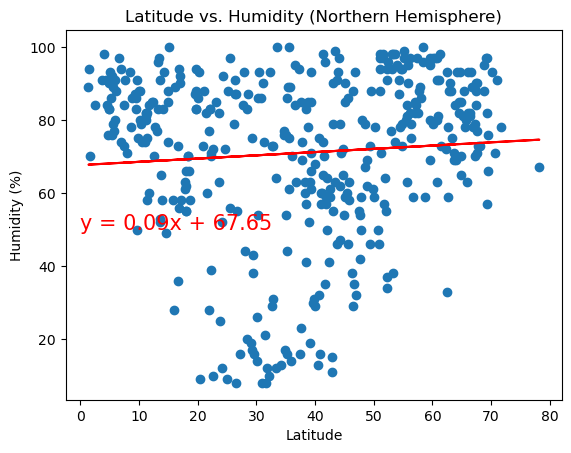

In [62]:
# Northern Hemisphere humidity vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude vs. Humidity (Northern Hemisphere)", "Humidity (%)", (0,50))

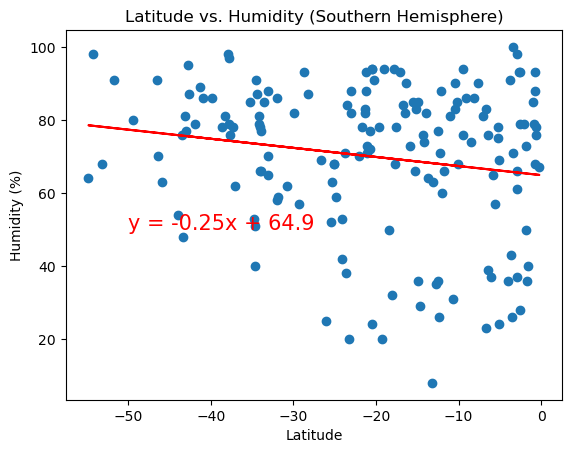

In [63]:
# Southern Hemisphere humidity vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude vs. Humidity (Southern Hemisphere)", "Humidity (%)", (-50,50))

In [ ]:
#The graph shows that the humidity in the Southern Hemisphere shows low nrgative to no correlation between latitude and humidity. WHile the Northern Hemisphere shows a weak positive corerelation between latitude and humidity.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

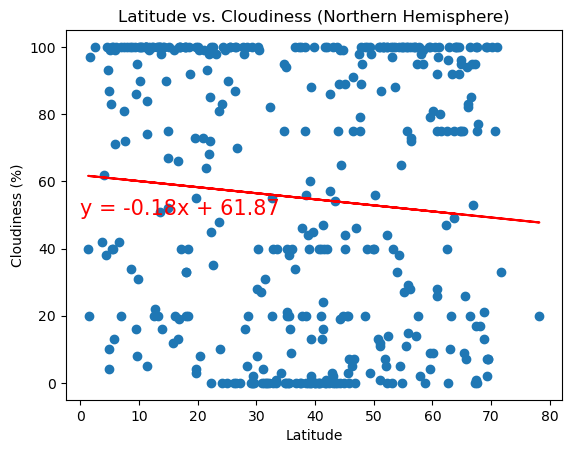

In [65]:
# Northern Hemisphere cloudiness vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude vs. Cloudiness (Northern Hemisphere)", "Cloudiness (%)", (0,50))

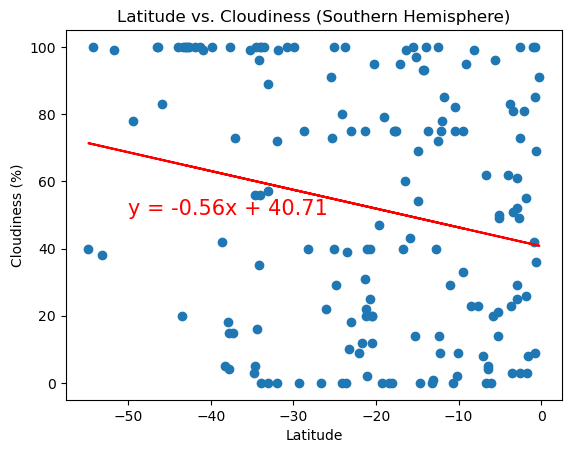

In [66]:
# Southern Hemisphere cloudiness vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude vs. Cloudiness (Southern Hemisphere)", "Cloudiness (%)", (-50,50))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The correlation between latitude and cloudiness in the Northern and Southern Hemisphere shows negative correlation based on the data.

### Wind Speed vs. Latitude Linear Regression Plot

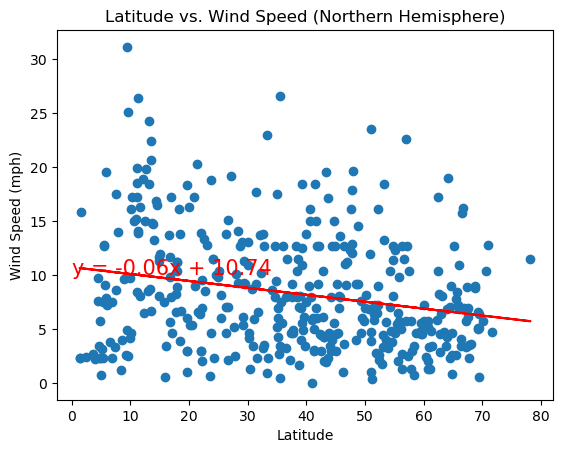

In [67]:
# Northern Hemisphere wind speed vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude vs. Wind Speed (Northern Hemisphere)", "Wind Speed (mph)", (0,10))

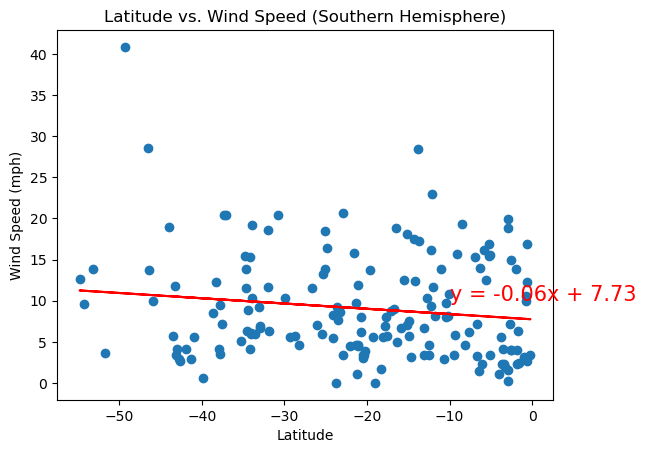

In [68]:
# Southern Hemisphere wind speed vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude vs. Wind Speed (Southern Hemisphere)", "Wind Speed (mph)", (-10,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The correlation between latitude and wind speed in the Northern and Southern Hemisphere shows a negative correlation based on the data.